## Od jednej zmiennej do wielu - regresja wieloraka

Regresja liniowa z jedną zmienną zależną (regresja prosta) różni się od regresji liniowej z wieloma zmiennymi zależnymi (regresja wieloraka) w kilku kluczowych aspektach:

### Liczba zmiennych

- **Regresja prosta**: W tym przypadku modeluje się zależność między jedną zmienną zależną (y) a jedną zmienną niezależną (x). Model ma postać:
  
  $$ y = \beta_0 + \beta_1 x + \epsilon $$

  gdzie:
  - $ \beta_0 $ to wyraz wolny,
  - $ \beta_1 $ to współczynnik regresji,
  - $ \epsilon $ to błąd losowy.

- **Regresja wieloraka**: Modeluje się zależność między jedną zmienną zależną a wieloma zmiennymi niezależnymi. Model ma postać:

  $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon $$

  gdzie $ x_1, x_2, \ldots, x_p $ to zmienne niezależne.

### Złożoność modelu

- **Regresja prosta**: Jest prostsza i łatwiejsza do interpretacji, ponieważ skupia się na jednej zmiennej niezależnej. Wizualizacja jest również prostsza, ponieważ można ją przedstawić na wykresie 2D jako prostą linię.

- **Regresja wieloraka**: Jest bardziej złożona, ponieważ uwzględnia wiele zmiennych niezależnych. Wizualizacja takiego modelu jest trudniejsza, ponieważ wymaga przestrzeni wielowymiarowej.

### Wpływ zmiennych

- **Regresja prosta**: Wpływ zmiennej niezależnej na zmienną zależną jest bezpośredni i łatwy do zrozumienia. Współczynnik regresji $ \beta_1 $ wskazuje, o ile zmienia się $ y $ przy jednostkowej zmianie $ x $.

- **Regresja wieloraka**: Wpływ każdej zmiennej niezależnej na zmienną zależną jest bardziej złożony, ponieważ zmienne mogą wpływać na siebie nawzajem.

## Case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)

In [2]:
df_raw = pd.read_csv('insurance.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### charges - kwota roczna wydana na świadczenia zdrowotne

In [4]:
df = df_raw.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### EDA

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
df[df['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [19]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
df.describe(include=['object']).T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [23]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<AxesSubplot:ylabel='Frequency'>

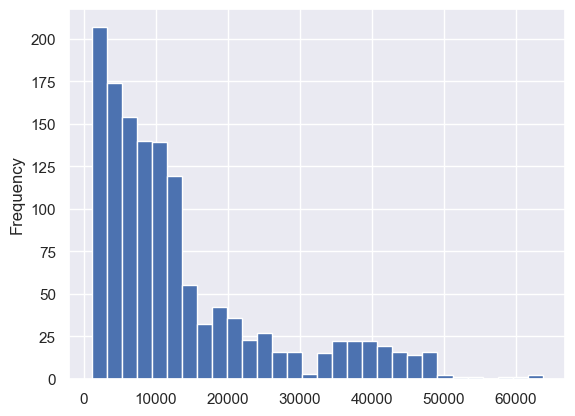

In [27]:
df.charges.plot(kind='hist', bins=30)

In [59]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [64]:
import plotly.express as px

px.histogram(df, x='charges', width=700, height=400, nbins=20, facet_col='smoker', facet_row='sex', histnorm='probability')

In [28]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype='int')
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [50]:
#df[(df['sex'] == 'female') & ((df['children'] == 1) | (df['region'] == 'northeast'))]

In [ ]:
del df_dummies['sex_male']

In [56]:
df_dummies.corr()['charges'].sort_values(ascending=False)

charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64

In [65]:
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [66]:
data = df_dummies.copy()
target = data.pop('charges')
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [67]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (1069, 8)
X_test shape: (268, 8)
y_trian shape: (1069,)
y_test shape: (268,)


In [69]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = regressor.predict(X_test)

In [73]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
900,8688.85885,8143.693884,545.164966
1064,5708.86700,5737.115683,-28.248683
1256,11436.73815,14369.314876,-2932.576726
298,38746.35510,31745.513636,7000.841464
237,4463.20510,8962.386657,-4499.181557


In [74]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE wynosi: {mae:.2f}')

MAE wynosi: 4177.05


In [75]:
regressor.intercept_

-11092.652295945947

In [76]:
regressor.coef_

array([  248.2107,   318.7014,   533.01  ,  -101.5421, 23077.7646,
        -391.7615,  -838.9196,  -659.1398])

In [77]:
data.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

### Dobór zmiennych do modelu - eliminacja wsteczna

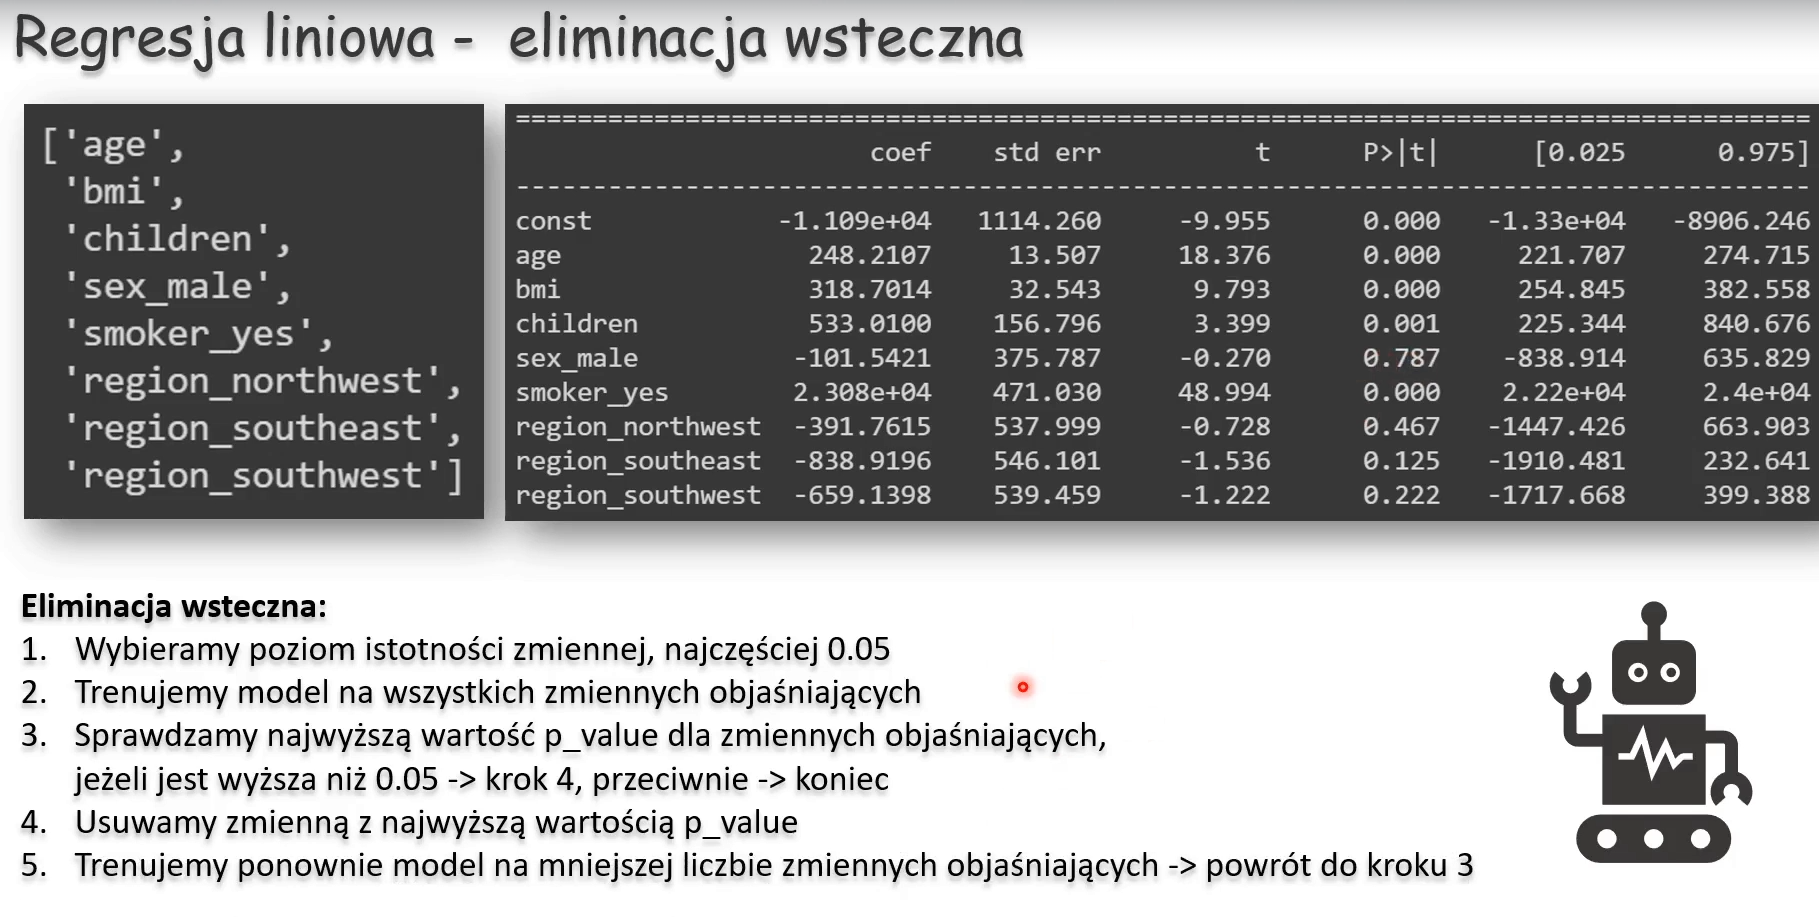

In [115]:
df_dummies = pd.get_dummies(df, dtype='int')
df_dummies

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [116]:
data = df_dummies.copy()
target = data.pop('charges')
data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (1069, 11)
X_test shape: (268, 11)
y_trian shape: (1069,)
y_test shape: (268,)


In [118]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
161,18,36.850,0,1,0,0,1,0,0,1,0
981,34,21.375,0,0,1,1,0,1,0,0,0
491,61,25.080,0,1,0,1,0,0,0,1,0
799,33,24.795,0,0,1,0,1,1,0,0,0
305,29,33.345,2,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
261,20,26.840,1,1,0,0,1,0,0,1,0
582,39,45.430,2,0,1,1,0,0,0,1,0
1165,35,26.125,0,1,0,1,0,1,0,0,0
72,53,28.100,3,1,0,1,0,0,0,0,1


In [119]:
sm.add_constant(X_train_ols)

,const,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1323,1.0,42,40.370,2,1,0,0,1,0,0,1,0
107,1.0,26,30.875,2,0,1,1,0,0,1,0,0
1039,1.0,19,27.265,2,0,1,1,0,0,1,0,0
1210,1.0,36,30.875,1,0,1,1,0,0,1,0,0
976,1.0,48,40.150,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
985,1.0,44,25.800,1,1,0,1,0,0,0,0,1
187,1.0,30,30.900,3,1,0,1,0,0,0,0,1
686,1.0,42,26.125,2,0,1,1,0,1,0,0,0
1206,1.0,59,34.800,2,1,0,1,0,0,0,0,1


In [120]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

array([[ 1.   , 18.   , 36.85 , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 34.   , 21.375, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 61.   , 25.08 , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 1.   , 35.   , 26.125, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 53.   , 28.1  , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 24.   , 28.5  , ...,  0.   ,  0.   ,  0.   ]])

In [121]:
X_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_female            int32
sex_male              int32
smoker_no             int32
smoker_yes            int32
region_northeast      int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
dtype: object

In [122]:
X_train_ols = sm.add_constant(X_train)
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()

In [123]:
predictors = list(X_train.columns)
print(ols.summary(xname=['const'] + predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     427.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:26:08   Log-Likelihood:                -10816.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1060   BIC:                         2.169e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -639.0617    473.274  

In [125]:
for i, p in enumerate(predictors):
    print(i, p)

0 age
1 bmi
2 children
3 sex_female
4 sex_male
5 smoker_no
6 smoker_yes
7 region_northeast
8 region_northwest
9 region_southeast
10 region_southwest


In [126]:
X_selected = X_train_ols.iloc[:, [0, 1, 2, 3,4,5, 6,7, 9, 10]]
predictors.remove('region_northwest')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     487.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:26:41   Log-Likelihood:                -10817.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1061   BIC:                         2.169e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -687.3269    532.007  

In [125]:
for i, p in enumerate(predictors):
    print(i, p)

0 age
1 bmi
2 children
3 sex_female
4 sex_male
5 smoker_no
6 smoker_yes
7 region_northeast
8 region_northwest
9 region_southeast
10 region_southwest


In [126]:
X_selected = X_train_ols.iloc[:, [0, 1, 2, 3,4,5, 6,7, 9, 10]]
predictors.remove('region_northwest')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     487.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:26:41   Log-Likelihood:                -10817.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1061   BIC:                         2.169e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -687.3269    532.007  